# Evaluating AIWC metrics between Cuda, OpenACC and OpenCL

We present an evaluation of the change in AIWC metrics between Cuda, OpenACC and OpenCL implementations of the same 2 algorithms.
OpenCL and Cuda codes are selected from the [Rodinia Benchmark Suite](https://github.com/BeauJoh/rodinia.git) which was chosen because it's original goal was as a comparison between languages on heterogenous computing architectures. Presently it boasts Cuda, OpenCL, OpenMP and OpenACC versions of several application codes.

cocl -- as part of [coriander](https://github.com/hughperkins/coriander.git) -- is used to perform the translation of Cuda to OpenCL codes, while [OpenARC](https://csmd.ornl.gov/project/openarc-open-accelerator-research-compiler/) is used for the OpenACC to OpenCL translation.
This project assumes OpenARC is setup in the codes directory -- for instance, `aiwc-for-the-masses/codes/OpenARC`.



In [1]:
%load_ext rpy2.ipython




## Set environment variables

In [6]:
%env COCL=/coriander/bin/bin/cocl
%env NVCC=/usr/local/cuda/bin/nvcc
%env OPENARC_ARCH=1 ACC_DEVICE_TYPE=RADEON

env: COCL=/coriander/bin/bin/cocl
env: NVCC=/usr/local/cuda/bin/nvcc
env: OPENARC_ARCH=1 ACC_DEVICE_TYPE=RADEON


## Results
This section generates and plots the results emphasising the difference in AIWC features spaces of Gaussian Elimination and Breadth-First-Search.

### Gaussian Elimination
The following code-block generates the AIWC feature spaces for the CUDA, OpenCL and OpenACC implementations, see the [Makefile](./Makefile) (specifically test_gaussian) for details.

In [7]:
! make test_gaussian

Makefile:100: warning: overriding recipe for target 'test_bfs'
Makefile:60: warning: ignoring old recipe for target 'test_bfs'
/coriander/bin/bin/cocl ./gaussian_cuda_version/gaussian.cu -o gaussian_opencl

Please use: `cocl_py`, which is easier to maintain, and portable

cocl args: ./gaussian_cuda_version/gaussian.cu -o gaussian_opencl
LLVM_COMPILE_FLAGS -I/coriander/soft/llvm-3.9.0.bin/include -D_GNU_SOURCE -D__STDC_CONSTANT_MACROS -D__STDC_FORMAT_MACROS -D__STDC_LIMIT_MACROS -I/coriander/soft/llvm-3.9.0.bin/include -fPIC -fvisibility-inlines-hidden -Wall -W -Wno-unused-parameter -Wwrite-strings -Wcast-qual -Wno-missing-field-initializers -pedantic -Wno-long-long -Wno-maybe-uninitialized -Wdelete-non-virtual-dtor -Wno-comment -Werror=date-time -std=c++11 -ffunction-sections -fdata-sections -fexceptions -D_GNU_SOURCE -D__STDC_CONSTANT_MACROS -D__STDC_FORMAT_MACROS -D__STDC_LIMIT_MACROS
+ /coriander/soft/llvm-3.9.0.bin/bin/clang++ -DUSE_CLEW -std=c++11 -x cuda -D__CORIANDERCC__ -D__CUD

cp gaussian_opencl_version/gaussianElim_kernels.cl .
g++ gaussian_opencl_version/*.cpp -I./gaussian_opencl_version/ -lOpenCL -o gaussian_hand_opencl
gaussian_opencl_version/clutils.cpp: In function '_cl_context* cl_init(char)':
gaussian_opencl_version/clutils.cpp:224:63: warning: '_cl_command_queue* clCreateCommandQueue(cl_context, cl_device_id, cl_command_queue_properties, cl_int*)' is deprecated [-Wdeprecated-declarations]
                             CL_QUEUE_PROFILING_ENABLE, &status);
                                                               ^
In file included from gaussian_opencl_version/clutils.cpp:57:0:
/usr/include/CL/cl.h:1443:1: note: declared here
 clCreateCommandQueue(cl_context                     /* context */,
 ^~~~~~~~~~~~~~~~~~~~
gaussian_opencl_version/clutils.cpp:227:74: warning: '_cl_command_queue* clCreateCommandQueue(cl_context, cl_device_id, cl_command_queue_properties, cl_int*)' is deprecated [-Wdeprecated-declarations]
     commandQueueNoProf = clCreateCo

OpenCL platform: Oclgrind
OpenCL device: Oclgrind Simulator
Architecture-Independent Workload Characterization of kernel: _Z4Fan1PfS_ii
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: mul count: 518
instruction: trunc count: 1536
instruction: call count: 1536
instruction: getelementptr count: 533
instruction: br count: 515
instruction: load count: 6
instruction: add count: 1030
instruction: store count: 3
instruction: fdiv count: 3
instruction: bitcast count: 515
instruction: ret count: 512
instruction: sext count: 9
instruction: icmp count: 512
instruction: sub count: 512
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+===========================================================

Using Platform 0 	 Device No 0 
This Context Type Not Supported
: Success
	gaussianElim_kernels.cl
Architecture-Independent Workload Characterization of kernel: Fan1
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: sext count: 9
instruction: fdiv count: 3
instruction: icmp count: 4
instruction: sub count: 4
instruction: mul count: 10
instruction: ret count: 4
instruction: getelementptr count: 18
instruction: load count: 6
instruction: br count: 7
instruction: call count: 12
instruction: store count: 3
instruction: add count: 14
instruction: trunc count: 4
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+


Architecture-Independent Workload Characterization of kernel: Fan1_kernel0
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: br count: 66
instruction: call count: 64
instruction: getelementptr count: 6
instruction: load count: 4
instruction: icmp count: 64
instruction: sub count: 64
instruction: add count: 72
instruction: store count: 2
instruction: trunc count: 64
instruction: mul count: 4
instruction: sext count: 4
instruction: fdiv count: 2
instruction: ret count: 64
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	add
	br
	call
	icmp
	sub
	tr

Results are stored in [gaussian_results](./gaussian_results) and are partitioned by the initial language implementation.
AIWC metrics are stored as csv files and are divided by the unique kernel name and the number of iterations that the kernel was invoked.

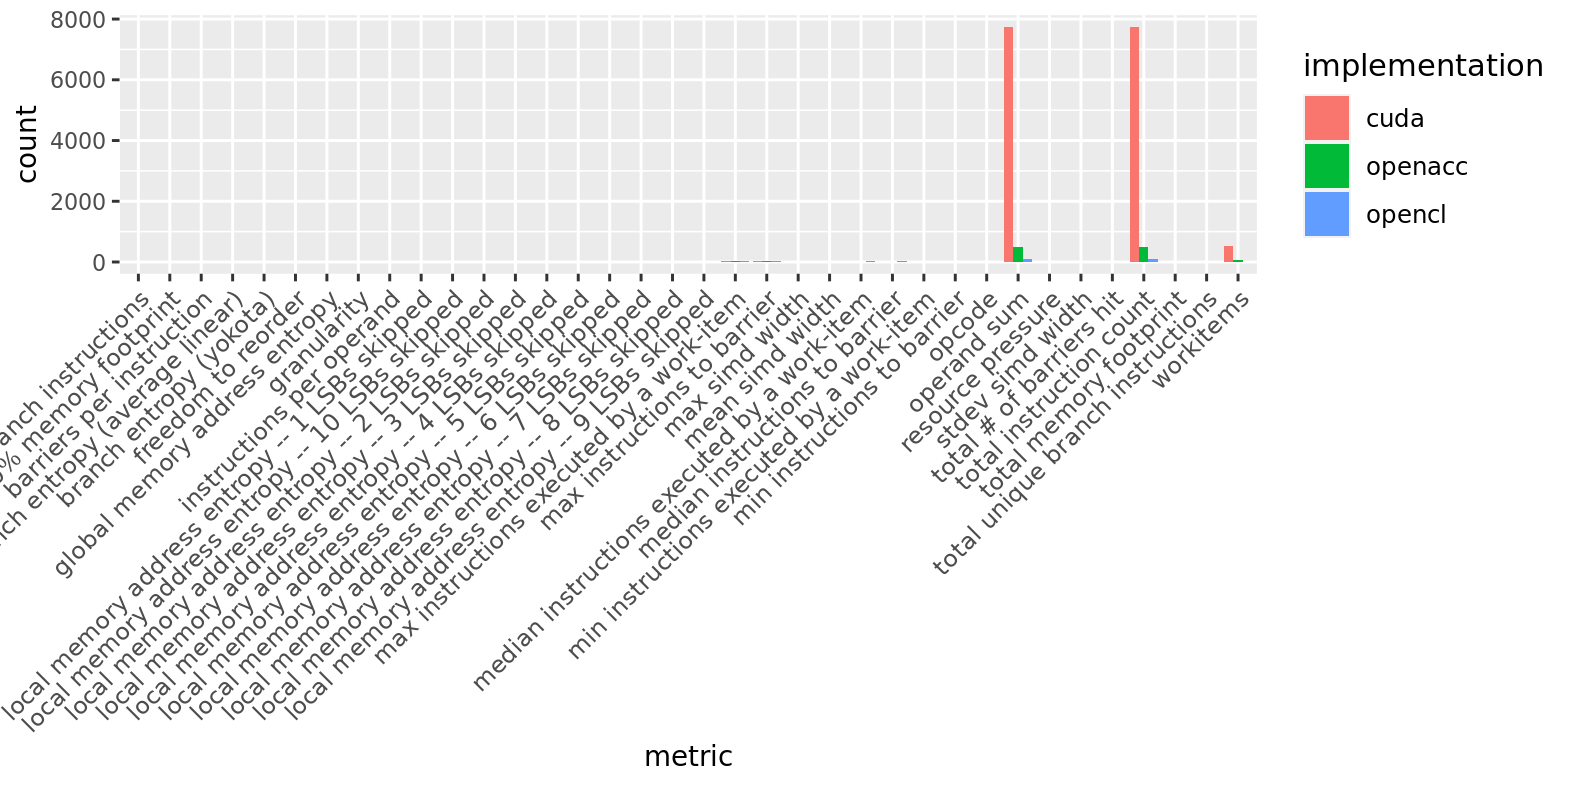

In [8]:
%%R -o fan1_invo0 -w 20 -h 10 --units cm -r 200

library('ggplot2')

# load the data
cud <- read.csv('./gaussian_results/cuda/aiwc__Z4Fan1PfS_ii_0.csv')
ocl <- read.csv('./gaussian_results/opencl/aiwc_Fan1_0.csv')
acc <- read.csv('./gaussian_results/openacc/aiwc_Fan1_kernel0_0.csv')

# tag the implementation
cud$implementation <- "cuda"
ocl$implementation <- "opencl"
acc$implementation <- "openacc"

# bring it together
fan1_invo0 <- rbind(cud,ocl,acc)

#print(fan1_invo0)

# plot the differences in AIWC metrics
p <- ggplot(data=fan1_invo0, aes(x=metric,y=count,fill=implementation)) +
        geom_bar(position="dodge",stat = "identity") +
        theme(axis.text.y = element_text(size = 8),
              axis.text.x = element_text(hjust = 1,angle=45),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size=10))
print(p)


The large difference in operand sum and total instruction count is interesting -- can we confirm that the work is partitioned the same way (say we have the same number of work-items running)?
Nonetheless, what differences do we see after dropping these biggest outliers?

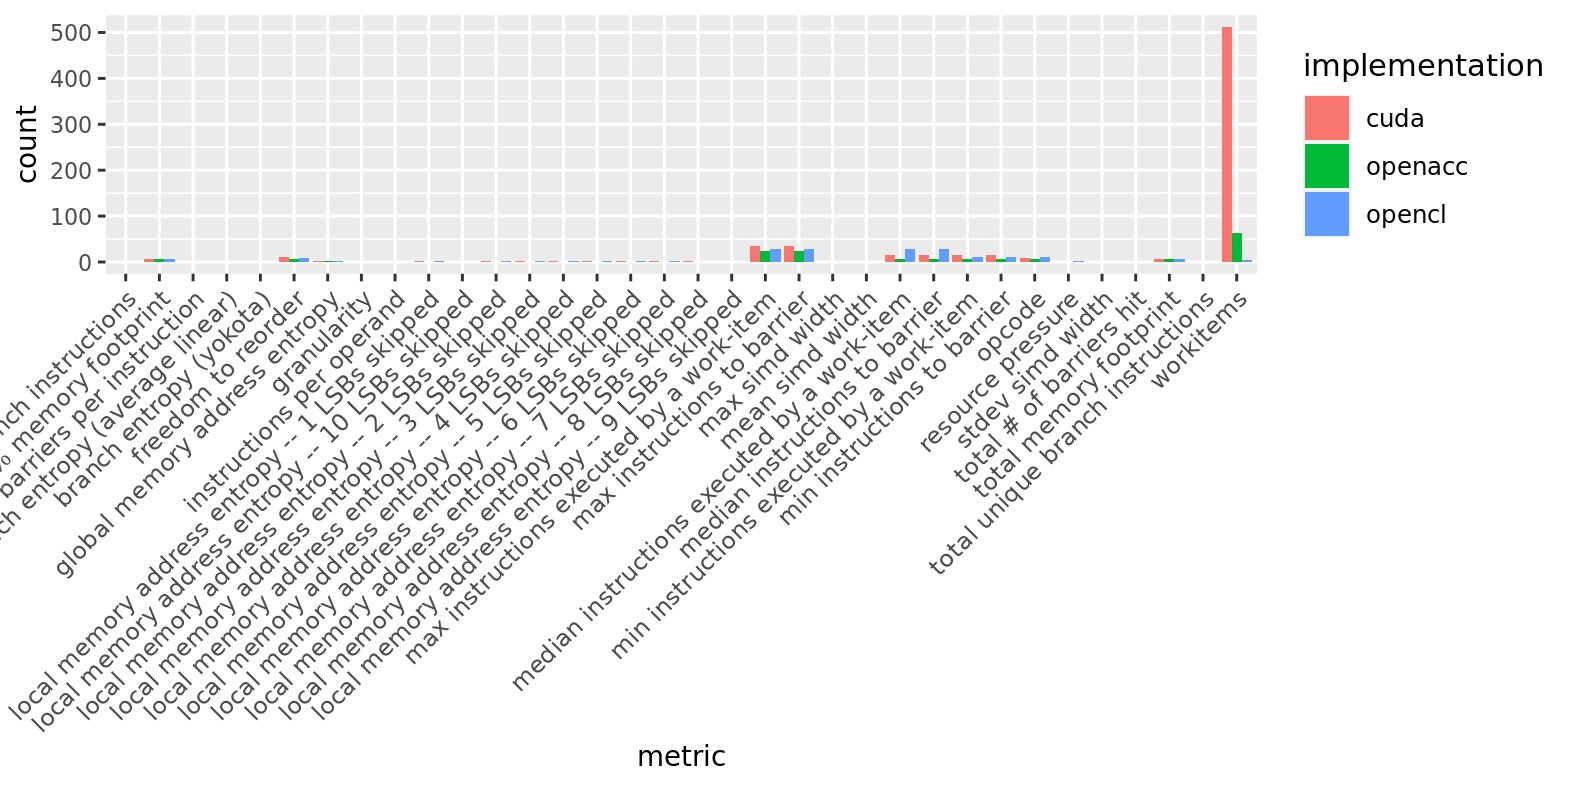

In [9]:
%%R -i fan1_invo0 -w 20 -h 10 --units cm -r 200

df <- fan1_invo0[fan1_invo0$metric != 'total instruction count' & fan1_invo0$metric != 'operand sum',]

library('ggplot2')

# plot the differences in AIWC metrics
p <- ggplot(data=df, aes(x=metric,y=count,fill=implementation)) +
        geom_bar(position="dodge",stat = "identity") +
        theme(axis.text.y = element_text(size = 8),
              axis.text.x = element_text(hjust = 1,angle=45),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size=10))
print(p)


Obviously the number of work-items differ markedly between the language implementations. Omitting the workitems metric yields a closer comparison of AIWC metrics.

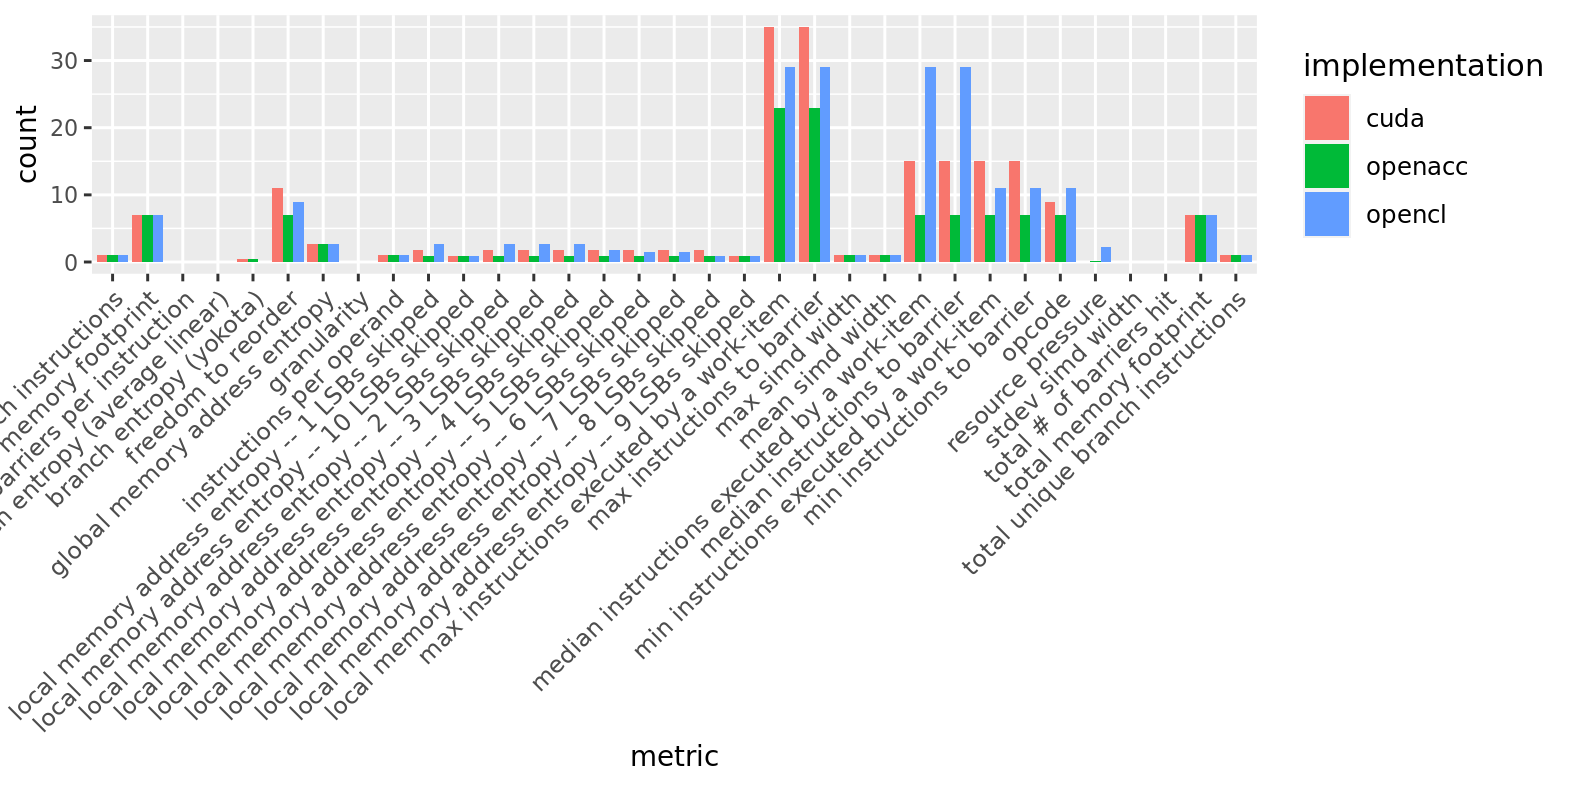

In [10]:
%%R -i fan1_invo0 -w 20 -h 10 --units cm -r 200

df <- fan1_invo0[fan1_invo0$metric != 'total instruction count' & fan1_invo0$metric != 'operand sum' & fan1_invo0$metric != 'workitems',]

library('ggplot2')

# plot the differences in AIWC metrics
p <- ggplot(data=df, aes(x=metric,y=count,fill=implementation)) +
        geom_bar(position="dodge",stat = "identity") +
        theme(axis.text.y = element_text(size = 8),
              axis.text.x = element_text(hjust = 1,angle=45),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size=10))
print(p)

Since the OpenCL AIWC feature-space is the baseline, we should express this difference as a ratio relative to the OpenCL.

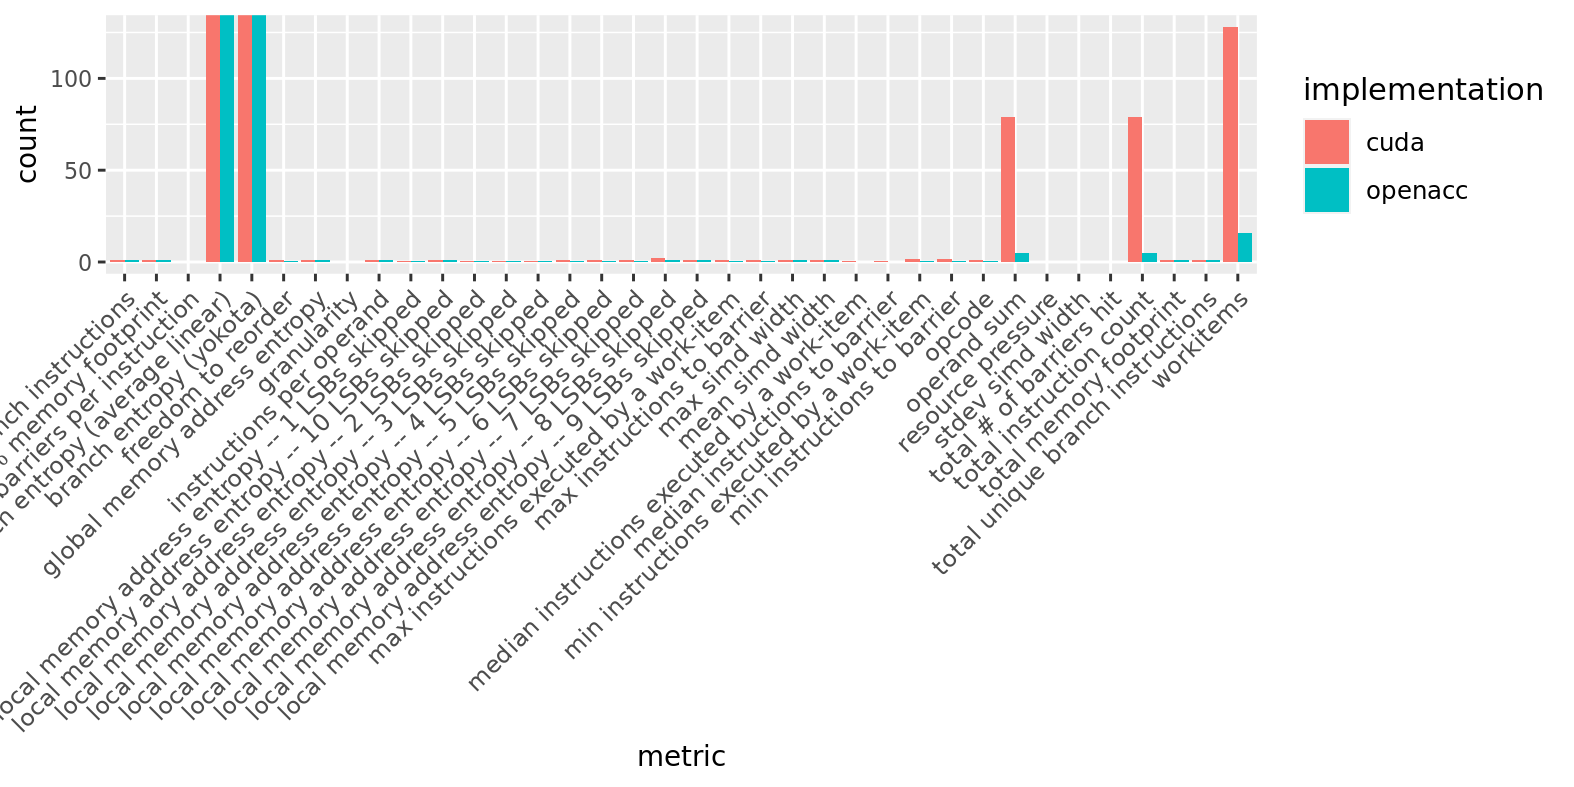

In [11]:
%%R -i fan1_invo0 -w 20 -h 10 --units cm -r 200

dat <- data.frame()
for (i in unique(fan1_invo0$metric)){
    cud = fan1_invo0[fan1_invo0$metric == i & fan1_invo0$implementation == 'cuda',]
    ocl = fan1_invo0[fan1_invo0$metric == i & fan1_invo0$implementation == 'opencl',]
    acc = fan1_invo0[fan1_invo0$metric == i & fan1_invo0$implementation == 'openacc',]
    #print(paste("Metric:",i))
    #print(paste("cuda was", cud$count))
    #print(paste("openacc was", acc$count))
    #print(paste("opencl was", ocl$count))

    cud$count = cud$count/ocl$count
    acc$count = acc$count/ocl$count
    #print(paste("cuda post normalization",cud$count))
    #print(paste("openacc post normalization",acc$count))

    dat <- rbind(dat,cud,acc)
}

library('ggplot2')

# plot the differences in AIWC metrics
p <- ggplot(data=dat, aes(x=metric,y=count,fill=implementation)) +
        geom_bar(position="dodge",stat = "identity") +
        theme(axis.text.y = element_text(size = 8),
              axis.text.x = element_text(hjust = 1,angle=45),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size=10))
print(p)

### Breadth-First-Search

## Compile Cuda code using standard nvidia compiler 

In [2]:
! $NVCC ./gaussian_cuda_version/gaussian.cu -o gaussian_cuda

## Compile OpenCL version of the Cuda code using cocl

In [3]:
! $COCL ./gaussian_cuda_version/gaussian.cu -o gaussian_opencl


Please use: `cocl_py`, which is easier to maintain, and portable

cocl args: ./gaussian_cuda_version/gaussian.cu -o gaussian_opencl
LLVM_COMPILE_FLAGS -I/coriander/coriander/soft/llvm-4.0/include -D_GNU_SOURCE -D__STDC_CONSTANT_MACROS -D__STDC_FORMAT_MACROS -D__STDC_LIMIT_MACROS -I/coriander/coriander/soft/llvm-4.0/include -fPIC -fvisibility-inlines-hidden -Wall -W -Wno-unused-parameter -Wwrite-strings -Wcast-qual -Wmissing-field-initializers -pedantic -Wno-long-long -Wcovered-switch-default -Wnon-virtual-dtor -Wdelete-non-virtual-dtor -Wstring-conversion -Werror=date-time -std=c++11 -ffunction-sections -fdata-sections -fexceptions -D_GNU_SOURCE -D__STDC_CONSTANT_MACROS -D__STDC_FORMAT_MACROS -D__STDC_LIMIT_MACROS
+ /coriander/coriander/soft/llvm-4.0/bin/clang++ -DUSE_CLEW -std=c++11 -x cuda -D__CORIANDERCC__ -D__CUDACC__ --cuda-gpu-arch=sm_30 -nocudalib -nocudainc --cuda-device-only -emit-llvm -O2 -S -Wno-gnu-anonymous-struct -Wno-nested-anon-types -I/coriander/coriander/soft/llvm-4.

## Functionality test of the OpenCL generated version

The code must produce the same results regardless of the compiler and backend before any further evaluation is performed.

In [4]:
! ./gaussian_cuda ./matrix4.txt

Matrix m is: 
    0.00     0.00     0.00     0.00 
    0.50     0.00     0.00     0.00 
    0.67     0.26     0.00     0.00 
   -0.00     0.15    -0.28     0.00 

Matrix a is: 
   -0.60    -0.50     0.70     0.30 
    0.00    -0.65    -0.05     0.55 
   -0.00     0.00    -0.75    -1.14 
    0.00    -0.00     0.00     0.50 

Array b is: 
-0.85 -0.25 0.87 -0.25 

The final solution is: 
0.70 0.00 -0.40 -0.50 


Time total (including memory transfers)	1.115455 sec
Time for CUDA kernels:	0.000068 sec


In [5]:
! ./gaussian_opencl ./matrix4.txt

OpenCL platform: NVIDIA CUDA
OpenCL device: Tesla P100-PCIE-12GB
ignoring cudaDeviceSynchronize for now
ignoring cudaDeviceSynchronize for now
ignoring cudaDeviceSynchronize for now
ignoring cudaDeviceSynchronize for now
ignoring cudaDeviceSynchronize for now
ignoring cudaDeviceSynchronize for now
Matrix m is: 
    0.00     0.00     0.00     0.00 
    0.50     0.00     0.00     0.00 
    0.67     0.26     0.00     0.00 
   -0.00     0.15    -0.28     0.00 

Matrix a is: 
   -0.60    -0.50     0.70     0.30 
    0.00    -0.65    -0.05     0.55 
    0.00    -0.00    -0.75    -1.14 
    0.00    -0.00     0.00     0.50 

Array b is: 
-0.85 -0.25 0.87 -0.25 

The final solution is: 
0.70 -0.00 -0.40 -0.50 


Time total (including memory transfers)	1.504010 sec
Time for CUDA kernels:	0.339834 sec


## Functionality test of the generated vs hand-coded versions

Next, we test for the same functionality against a manually written version.

### Compile the hand-coded version

In [6]:
!cd gaussian_opencl_version/ && g++ gaussianElim.cpp  clutils.cpp utils.cpp -lOpenCL -std=c++11 -o gaussian_hand_opencl && cd ..
!mv gaussian_opencl_version/gaussian_hand_opencl . && cp gaussian_opencl_version/gaussianElim_kernels.cl .

clutils.cpp: In function '_cl_context* cl_init(char)':
clutils.cpp:223:24: warning: '_cl_command_queue* clCreateCommandQueue(cl_context, cl_device_id, cl_command_queue_properties, cl_int*)' is deprecated [-Wdeprecated-declarations]
     commandQueueProf = clCreateCommandQueue(context, device, 
                        ^
In file included from clutils.cpp:57:0:
/usr/include/CL/cl.h:1359:1: note: declared here
 clCreateCommandQueue(cl_context                     /* context */,
 ^
clutils.cpp:223:24: warning: '_cl_command_queue* clCreateCommandQueue(cl_context, cl_device_id, cl_command_queue_properties, cl_int*)' is deprecated [-Wdeprecated-declarations]
     commandQueueProf = clCreateCommandQueue(context, device, 
                        ^
In file included from clutils.cpp:57:0:
/usr/include/CL/cl.h:1359:1: note: declared here
 clCreateCommandQueue(cl_context                     /* context */,
 ^
clutils.cpp:224:63: warning: '_cl_command_queue* clCreateCommandQueue(cl_context, cl_device_i

In [7]:
! ./gaussian_hand_opencl ./matrix4.txt -p 0 -d 0

Using Platform 0 	 Device No 0 
Creating GPU Context

	gaussianElim_kernels.cl
The result of matrix m is: 
    0.00     0.00     0.00     0.00 
    0.50     0.00     0.00     0.00 
    0.67     0.26     0.00     0.00 
   -0.00     0.15    -0.28     0.00 

The result of matrix a is: 
   -0.60    -0.50     0.70     0.30 
    0.00    -0.65    -0.05     0.55 
    0.00    -0.00    -0.75    -1.14 
    0.00    -0.00     0.00     0.50 

The result of array b is: 
-0.85 -0.25 0.87 -0.25 

The final solution is: 
0.70 -0.00 -0.40 -0.50 



## AIWC feature-space comparison between the generated and hand-coded version

Here they should be similar enough to show that AIWC and it's OpenCL back-end is suitable for language agnostic architecture-independent workload characterization

In [10]:
! $OCLGRIND_BIN --aiwc ./gaussian_hand_opencl matrix4.txt -p 0 -d 0

Using Platform 0 	 Device No 0 
This Context Type Not Supported
: Success
	gaussianElim_kernels.cl
Architecture-Independent Workload Characterization of kernel: Fan1
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 18
instruction: load count: 6
instruction: br count: 7
instruction: sext count: 9
instruction: call count: 4
instruction: add count: 10
instruction: trunc count: 4
instruction: store count: 3
instruction: icmp count: 4
instruction: mul count: 6
instruction: ret count: 4
instruction: sub count: 4
instruction: fdiv count: 3
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Un

In [12]:
! $OCLGRIND_BIN --aiwc ./gaussian_opencl ./matrix4.txt

OpenCL platform: Oclgrind
OpenCL device: Oclgrind Simulator
Architecture-Independent Workload Characterization of kernel: _Z4Fan1PfS_ii
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: sub count: 512
instruction: bitcast count: 515
instruction: icmp count: 512
instruction: mul count: 518
instruction: trunc count: 1536
instruction: store count: 3
instruction: fdiv count: 3
instruction: ret count: 512
instruction: add count: 1030
instruction: br count: 515
instruction: load count: 6
instruction: getelementptr count: 533
instruction: call count: 1536
instruction: sext count: 9
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+===========================================================

Architecture-Independent Workload Characterization of kernel: _Z4Fan1PfS_ii
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: sub count: 512
instruction: bitcast count: 513
instruction: icmp count: 512
instruction: mul count: 514
instruction: sext count: 3
instruction: call count: 1536
instruction: getelementptr count: 519
instruction: load count: 2
instruction: br count: 513
instruction: add count: 1026
instruction: trunc count: 1536
instruction: fdiv count: 1
instruction: store count: 1
instruction: ret count: 512
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dyna